# Experience-Weighted Attraction (EWA) - Model Introduction and Implementation in Python
 
## Simulating dynamic equilibria with economic models of learning

This notebook describes the stepwise implementation of the EWA model in bi-matrix ($2\times2$) strategic-form games, for the simulation of economic learning processes. The output is a dataset with the simulated values of Attractions, Experience, selected strategies and payoffs gained, for the desired number of rounds and periods. 

Notebook Author: Vinícius Ferraz <br>
Researcher in Behavioral & Experimental Economics<br>
Alfred-Weber Institute for Economics<br>
University of Heidelberg

March 2022

--------

## 1. Introduction to Economic Models of Learning

Economic learning theories demonstrated how economic theory and psychology are becoming more linked. In essence, economic theory frequently overlooks concepts related to learning, , assuming knowledge is perfect and rationality is given, then the correct choices can be promptly identified, and agents will change strategies only when information changes (Baddeley, 2018). In this context, learning models can be described as quantitative, time-dependent functions of strategies known as attractions, which resemble a "stock" of learning that builds up over time as new information comes along. The given learning models are characterized according to the learning rules that update these attractions (Moffatt, 2015).

In summary, the learning process is the process that causes the evolution towards equilibrium. In interactive (dynamic) contexts (e.g., a repeated game against a fixed opponent), learning about the behavior of other players becomes an important driver of decisions. In this case, economic models of learning allow for the possibility for strategies to change over time. 

The ***Experience-Weighted Attraction (EWA)*** model (Camerer & Ho, 1999) is a hybrid model that incorporates features of two well-known economic learning models: ***Reinforcement Learning (RL)*** and ***Belief Learning (BL)***. As the EWA is a hybrid RL/BL model, it can collapse to one or the other depending on how initial parameters are setup. This document will walk through definitions from both models, the implementation of the EWA model and how to use it as a RL or BL model if necessary. All three models use the concept of ***attractions***, which are weights assigned to strategy, and updated after every decision. The following model descriptions are based in Moffat's (2015) implementation instructions. The actual EWA implementation in Python was designed by the author, based on Moffat (2015) and Camerer & Ho (1999). 

### 1.1 General Notation

The following table displays the general notation we use in the formulas for the learning models


|  <div style="width:150px">Variable</div>  | Definition |
| :-: | :- | 
| $i$ | Player index (e.g., $i=1,2$, for a bi-matrix game example) |
| $t, T$ | (Round index t = $1,...,T$)|
| $s_j^0, s_j^1$ | Strategies $0$ and $1$ (for a bi-matrix game example) |
| $s_{i}(t)$ | Strategy chosen by player $i$ in round $t$ |
| $s_{-i}(t)$ | Strategy chosen by the other player |
| $\pi_i(s_i(t),s_{-i}(t))$ | Player $i$’s payoff in round $t$ (scalar-valued function) |
| $A_i^j(t), j=0,1$ | Attractions: set of variables that are updated over time. This notation represents player $i$’s attraction to strategy $j$, following round $t$ |
| $A_i^j(0)$ | Initial attractions. Players are likely to have experience before playing the game. These are parameters that must be estimated. Identification requires normalizing one of the initial attractions to zero for each player. |
|$P_i^j(t)$ | Choice probabilities for player $i$’s strategy $j$ in round $t$ |

### <font color='darkblue'>1.2 Reinforcement Learning (RL)</font>

Introduced in the economics contecxt by Erev & Roth (1998), Reinforcement Learning is a model in which payers change their choice probabilities in reactions to payoffs from previous rounds. The RL attraction update function is given as: 

\begin{equation}
    A_j^i(t) = A_i^j(t-1)+I(s_i^j,s_i(t))\pi_i(s_i^j,s_{-i}(t))
\end{equation}

Where $I$ is the indication function, taking the value of $1$ if the statement is true and $0$ otherwise. This means that in RL, <ins>a player’s attraction to a strategy can only increase if that strategy is chosen.</ins> $\phi$ indicates the speed at which past payoffs are forgotten. $\phi=0$ would indicate that only the most recent payoff is remembered. $\phi=1$ would indicate that all past payoffs have equal weights in the current decision. As in the other models, initial attractions have to be estimated. 

### <font color='darkblue'>1.3 Belief Learning (BL)</font>


Based on the work of  Cheung and Friedman (1997). In BL, attractions are built by attaching probabilities to each strategy combination of other players, giving a time-dependent function in which beliefs about other players are updated as history unfolds. Players track the relative frequency of other players' strategies, and these relative frequencies generate beliefs about other players' actions in the next round. Payers change their choice probabilities in response not only to the actual payoff received, but also to the payoffs they would have received by choosing each possible strategy. 

In BL models, attractions are updated differently. We assume that players choose the best response to the behavior (of their opponent) observed in the previous periods. We consider two BL model variations: 

**Cournot Model:** : players choose the best response to opponents most recently observed action, that is, only the opponent’s **last** action is counted: 

\begin{equation}
    A_j^i(t) = A_i^j(t-1)+\pi_i(s_i^j,s_{-i}(t))
\end{equation}

Where following each round $(t)$, player $i$’s attraction to strategy $j$ simply increases by the payoff that was, or would have been, received, given the choice of the other player $s_{-i}(t)$.

**Fictitious Play (FP):** players respond to the average of the observed history with previous observations, counted and weighted equally. Assuming the initial attractions are equal to $0$, this model is represented as: 

\begin{equation}
    \frac{A_j^i(t) = N(t-1)A_i^j(t-1)+\pi_i(s_i^j,s_{-i}(t))}{N(t)}
\end{equation}

In this model, $N(t)$ is the number of rounds passed, or $t$. 

**Weighted Fictitious Play (FP):** In this variation, we assume the experience of recent rounds carries more weight than that of rounds further in the past, introducing a **recency parameter ($\phi$)**, similar to RL. Observations $t$ periods back will be weighted $\phi^{t-1}$. Attractions are weighted averages of current and previous (hypothetical) payoffs. We can also introduce $\phi$ to $N(t)$ model, as $N(t) = \phi N(t-1)+1$, formalizing: 

\begin{equation}
    \frac{A_j^i(t) = \phi N(t-1)A_i^j(t-1)+\pi_i(s_i^j,s_{-i}(t))}{\phi N(t-1)+1}
\end{equation}

The variable $N(t)$ is a measure of the amount of past experience accumulated at round $t$, measured in “observation equivalents. If the recency parameter $\phi=1$, weighted fictitious play become normal fictitious play, as there is no down-weighting of past observations. Also, if $\phi=0$, it becomes the Cournot learning model.

### <font color='blue'>1.4 Experience-Weighted Attraction (EWA)</font>

Combination of RL and BL. EWA generates a time-dependent function that “nests” RL and BL. For EWA, the updating rules for the two variables (experience and attraction) are are described below (recap). 

The updating rule for $N$ is: 
\begin{equation}
    N(t) = \rho N(t - 1) + 1,  t\geq1
\end{equation}

Set value of $1$ is added each round, and previous past experiences are depreciated with a discount factor $\rho$.

Subsequently, for updating attractions, the following steps are taken. Assuming $A_i^j(t)$ is the attraction of player $i$ in round $t$, and $A_i^j(0)$ is the initial attractions, at the start of the game, the updating rule consists of three steps: 

**Step 1 - Keeping discounted old attractions term** 
\begin{equation}
    \phi N(t-1) A_i^j(t-1)
\end{equation}

Where $\phi$ is the second discount rate for old attractions (can be different from $\rho$).

**Step 2 - Adding Value for current round** 
\begin{equation}
    \phi N(t-1)A_i^j(t-1)+[\delta + (1-\delta)I(s_i^j,s_i(t))]\pi_i(s_i^j,s_{-i}(t))
\end{equation}

Where $I$ is the indicator function, Where $I$ is the indicator function. $I=1$ if the strategy was used in this round and $I=0$ otherwise. $\delta$ is the weight added for used versus unused strategies. When $\delta=0$, only used strategy is updated (as in RL). When $\delta=1$, used and unused strategies are treated the same (BL/FP). 

**Step 3 - Normalization with experience:** 
\begin{equation}
    A_j^i(t) = \frac{\phi N(t-1)A_i^j(t-1)+[\delta + (1-\delta)I(s_i^j,s_i(t))]\pi_i(s_i^j,s_{-i}(t))}{\rho N(t-1)+1}
\end{equation}

The parameter $\rho$ represents the depreciation rate of past experience and is expected to be slightly less than $1$. In the attractions equation, the second term of the numerator is either the payoff received from the chosen strategy, or the payoff that would have been received from the unchosen strategy.

### <font color='blue'>1.5 EWA Parameters Definition (recap)</font>

Recap of parameters to be setup before running the model

|  <div style="width:150px">Parameter</div>  | Definition |
| :-: | :- |
| $\rho$ | Depreciation rate of past experience (should usually be slightly less than 1) |
| $\delta$ | Weight added for used versus unused strategies (i.e. weight on hypothetical payoffs) |
| $\phi$ | Second discount rate for past experience (can be different than $\rho$), also defined as a recency parameter |
| $\lambda$ | Sensitivity to attractions (weight to attractions, if $\lambda=0$, attractions are irrelevant, if $\lambda$ is large, attractions are important|
| $A_i^j(0)$ | Shape of previous experience (actually up to $i$ times $j$ parameters) |
| $A_1^1(0)$| Initial attraction for player 1 |
| $A_1^2(0)$| Initial attraction for player 2 |
| $N(0)$| Initial experince level (strenght of previous experience of the subjects) |

### <font color='blue'> 1.6 Restricted EWA as BL or RL</font>

The EWA is a function that nests both BL and RL models, with restrictions on the model parameters, the EWA can collapse to one of the component models of interest, as described below:

<img src="../images/cube.png" width="450">
<center><font color='gray'> Source: Ho, Camerer & Chong (2007)</font></center>
<br>

The restrictions are given as follows: 
 - **Reinforcement Learning**: 
     - $\delta = 0$ 
     - $N(0)=1$ 
     - $\rho=0$ 
     - ***model collapses to RL***
 
- **Belief Learning**: 
    - $\delta=1$ 
    - $\rho = \phi$ ($=1$ for Fictitious Play, $=0$ for Cournot adj.
    - and a proper choice rule is used (max)
    - ***model collapses to BL***


### <font color='darkblue'>1.7 Choice Probabilities Generation</font>

**The choice probabilities (for all three models) in any period are determined by the attractions in the previous period.** The probabilities are obtained using this logistic transformation (the authors also suggest Probit transformation):

\begin{equation}
    P_j^i(t) = \frac{\exp\left(\lambda A_i^j(t-1)\right)}{\exp\left(\lambda A_i^1(t-1)\right) + \exp\left(\lambda A_i^0(t-1)\right)}
\end{equation}

This equation can also be written as follows (generalized), in case of more than two strategies available for the agents:

\begin{equation}
P_i^j(t+1) = \frac{e^{\lambda A_i^j(t)}}{\sum_{k=1}^{m_{i}}e^{\lambda A_j^k(t)}}
\end{equation}

Where $P_i^j(t+1)$ is the probability of player $i$ to play strategy $j$ in round $t$ and $m_i$ is the number of strategies player $i$ has. 

------

### 1.8 $2\times2$ Strategic-Form Games - Taxonomy and Linear Encoding Scheme

The strategic representation of a game consists of a set of players (2), a set of strategies for each player (2) and an outcome (pay-off) for each vector of strategies, based on the individual utilities of the players. This representation ignores dynamic aspects, such as the order of the moves of the players, chance moves, and the informational structure. Applying this definition to our $2\times2$ restriction, we have the following construct: 

<br>
<img src="../images/encoding_scheme1.png" width="600">

The players strategies and payoffs are read by the program and used for the computation of the decision scenarios. 
In this algorithm, we encode game matrices (linear representation) in a python <code>list</code> structure, following the specifications below.

<img src="../images/encoding_scheme2.png" width="600">

In the case of this example, we would define this game with the folling variables: 
- <code>p1_payoffs = [1, 2, 3, 4]</code>
- <code>p2_payoffs = [5, 6, 7, 8]</code>

From these two list assignments, the algorithm will understand the game structure and how it is supposed to be played.

--------

## 2. EWA Python Implementation

The code that follows is for the implementation of a basic EWA model for a bi-matrix game structure. 

In [1]:
# Imports (requirements)
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Experience-Weighted Attraction - Model Tuning

# EWA Models' parameters
rho = 0.97 # Depreciation rate of past experience (should usually be slightly less than 1)
delta = 0.60 # Weight added for used versus unused strategies
phi = 0.94 # Second discount rate for past experience (can be different than rho)
lam = 0.80 # Sensitivity to attractions

# Initial attractions (A) - 2x2
A_0_p1s1 = 1 # Player 1's Initial attraction to strategy 1
A_0_p1s2 = 0 # Player 1's initial attraction to strategy 2
A_0_p2s1 = -2 # Player 2's Initial attraction to strategy 1
A_0_p2s2 = 0 # Player 2's Initial attraction to strategy 2

# Initial experience (N)
N_0 = 1

# Rounds
n_sims = 50 # epochs (outer loop)
n_periods = 1000 # rounds within epochs (inner loop)

The initial parameters of the model must be estimated and defined according to the simulation targets, as per the overview provided in **1.5**. Additionally, the number of simulation rounds and periods can be set up according to the practicioner's choice

In [3]:
# Game Structure Definitions (2x2)

# Defining the matrix game in a vector-like structure
p1_payoffs = [1, 0, 0, 2] # p1's (ROW) payoffs in a bi-matrix arrangement
p2_payoffs = [-1, 0, 0, -2] # p2's (COLUMN) payoffs in a bi-matrix arrangement

# Create a matrix for each of the payers' strategy profiles
p1_mat = p1_payoffs[:2], p1_payoffs[2:]
p2_mat = p2_payoffs[:2], p2_payoffs[2:]

# Probability arrays returned by selected strategies (for payoffs computation via matrix multiplication)
s1_array = np.asarray([1, 0])
s2_array = np.asarray([0, 1])

The $2\times2$ game used in the simulation is defined in this section by providing the payoffs from each players following the encoding scheme in **1.8**

In [4]:
print('Player 1 payoffs: ' + str(p1_mat))
print('Player 2 payoffs: ' + str(p2_mat))
print()
print('Game Matrix Visualization')
print()
print('|'+str(p1_payoffs[0])+', '+str(p2_payoffs[0])+'|'+ str(p1_payoffs[1])+', '+str(p2_payoffs[1])+' |')
print('|-----|-----|')
print('|'+str(p1_payoffs[2])+', '+str(p2_payoffs[2])+' |'+ str(p1_payoffs[3])+', '+str(p2_payoffs[3])+'|')

Player 1 payoffs: ([1, 0], [0, 2])
Player 2 payoffs: ([-1, 0], [0, -2])

Game Matrix Visualization

|1, -1|0, 0 |
|-----|-----|
|0, 0 |2, -2|


In [5]:
# Generation of choice probabilities via logistic transformation of the Attraction weights
def probabilities_generation(lam, A_ij, A_i0, A_i1):
    prob_strategy = math.exp(lam * A_ij) / (math.exp(lam * A_i1) + math.exp(lam * A_i0))
    return prob_strategy

<code>probabilities_generation()</code> applies the logit transformation formula described in **1.7**, for generating the choice probabilities for each player and strategy
    

In [7]:
# Strategy selection function
def strategy_selection(prob_i0):
    rand_u = random.uniform(0, 1)
    if rand_u <= prob_i0:
        strat_i = s1_array
    else:
        strat_i = s2_array
    return strat_i

<code>strategy_selection()</code> returns a strategy choice for an agent, based in the probability generated by the attractions compared against a random uniform float 

In [8]:
# Generation of possible payoff scenarios, given the players' selected strategies
def payoffs_generation(s1_array, s2_array, p1_mat, p2_mat, strat_p1, strat_p2):
    # Payoffs computation (via matrix multiplication)
    payoff_p1_s1 = np.dot(
        np.dot(s1_array, p1_mat), strat_p2
    )  # Payoff player 1 receive for strategy 1, given the choice of player 2
    payoff_p1_s2 = np.dot(
        np.dot(s2_array, p1_mat), strat_p2
    )  # Payoff player 1 receive for strategy 2, given the choice of player 2
    payoff_p2_s1 = np.dot(
        np.dot(strat_p1, p2_mat), s1_array
    )  # Payoff player 2 receive for strategy 1, given the choice of player 1
    payoff_p2_s2 = np.dot(
        np.dot(strat_p1, p2_mat), s2_array
    )  # Payoff player 2 receive for strategy 2, given the choice of player 1
    return payoff_p1_s1, payoff_p1_s2, payoff_p2_s1, payoff_p2_s2

<code>payoffs_generation()</code> computes the payoffs for each agent, for both selected (realized payoff) and unselected strategies (missed payoff), according to the other agent's decision via matrix multiplication, using the dot product algebraic operation. The strategies adopted by an agent (player ) during the execution of a game scenario could be either Strategy 1 ($p_i^1(t)$) or Strategy 2 ($p_i^2(t)$), for which the probability distribution yielded was expressed by the following state vectors:

\begin{equation}
	\begin{split}
		p_i^1(t) = (1 \quad 0) \\
		p_i^2(t) = (0 \quad 1)
	\end{split}
\end{equation}

These vectors are represented in this program by the following arrays <code>(s1_array, s2_array)</code>. We may depict the game (choice scenario) between two players by representing the reward matrix of the game structure as the matrix $ABCD$, where each player select one of the possible strategies, we have the following matrix equation:

\begin{equation}
	\pi_1^j(t), \pi_2^j(t) =
	\begin{pmatrix}
		p_2^1(t), \\
		p_2^2(t) 
	\end{pmatrix}
	.
	\begin{bmatrix}
		A & B \\
		C & D 
	\end{bmatrix}
	. 
	(p_1^1(t), p_1^2(t)) 
\end{equation}

The above scenario would define the game outcome by the tuple of payoff in the selected matrix cell (Tanimoto, 2015), having $\pi_1^j(t), \pi_2^j(t)$ as the payoffs for players 1 and 2 for strategy $j$ on time $t$ .

In [9]:
# Computation of weighted payoffs for attractions calculations based on the players' selected strategies
def weighted_payoffs_generation(
    strat_p1, strat_p2, payoff_p1_s1, payoff_p1_s2, payoff_p2_s1, payoff_p2_s2
):  
    # Defining weights for payoffs based on the selected strategy (to be weighted by delta)
    # Validation done via comparison of numpy arrays
    strategy_p1_comp = strat_p1 == s1_array
    if strategy_p1_comp.all():
        p1_strategy = 1
        I_p1s1 = 1
        I_p1s2 = 0
    else:
        p1_strategy = 2
        I_p1s1 = 0
        I_p1s2 = 1
    wp_p1s1 = (delta + (1 - delta) * I_p1s1) * payoff_p1_s1
    wp_p1s2 = (delta + (1 - delta) * I_p1s2) * payoff_p1_s2
    strategy_p2_comp = strat_p2 == s1_array
    if strategy_p2_comp.all():
        p2_strategy = 1
        I_p2s1 = 1
        I_p2s2 = 0
    else:
        p2_strategy = 2
        I_p2s1 = 0
        I_p2s2 = 1
    wp_p2s1 = (delta + (1 - delta) * I_p2s1) * payoff_p2_s1
    wp_p2s2 = (delta + (1 - delta) * I_p2s2) * payoff_p2_s2
    return p1_strategy, p2_strategy, wp_p1s1, wp_p1s2, wp_p2s1, wp_p2s2

The <code>weighted_payoffs_generation()</code> function generates a weighted version of the payoff values based on the strategies chosen. As defined in **1.4**, we apply an indicator $I$ to weight selected strategies. This variable takes the value of $1$ if the strategy is selected and $0$ if it is not selected. 

The weighted payoffs generation comprises the second term of the numerator attraction update equation (highlighted in <font color='blue'>blue color</font>): 

\begin{equation}
\phi N(t-1)A_i^j(t-1)+\color{blue}{[\delta + (1-\delta)I(s_i^j,s_i(t))]\pi_i(s_i^j,s_{-i}(t))}
\end{equation}

In [10]:
# Attraction calculation formula (weighted payoffs (w) calculated in the weighted_payoffs_generation() function)
def ewa_attraction(phi, A, N, N_new, w):
    A_new = (phi * N * A + w) / N_new
    return A_new

<code>ewa_attraction()</code> executes the attraction update formula
\begin{equation}
\phi N(t-1)A_i^j(t-1)+[\delta + (1-\delta)I(s_i^j,s_i(t))]\pi_i(s_i^j,s_{-i}(t))
\end{equation}

Having $w_i^j(t)=[\delta + (1-\delta)I(s_i^j,s_i(t))]\pi_i(s_i^j,s_{-i}(t))$, as the product from the <code>weighted_payoffs_generation()</code>, this function takes $w$ and $N(t)$ as an inputs with pre-calulated values in order to generate the attraction, so this function was implemented as: 

\begin{equation}
A_j^i(t) = \frac{\phi N(t-1)A_i^j(t-1)+w_i^j(t)}{N(t)}
\end{equation}


In [11]:
# Attraction update rule - create attraction values for current period (t)
def ewa_update(
    rho, A_p1s1, A_p1s2, A_p2s1, A_p2s2, wp_p1s1, wp_p1s2, wp_p2s1, wp_p2s2, N
):
    N_new = rho * N + 1
    # Update for player 1
    A_p1s1 = ewa_attraction(phi, A_p1s1, N, N_new, wp_p1s1)
    A_p1s2 = ewa_attraction(phi, A_p1s2, N, N_new, wp_p1s2)
    # Update for player 2
    A_p2s1 = ewa_attraction(phi, A_p2s1, N, N_new, wp_p2s1)
    A_p2s2 = ewa_attraction(phi, A_p2s2, N, N_new, wp_p2s2)
    return A_p1s1, A_p1s2, A_p2s1, A_p2s2, N_new

 <code>ewa_update()</code> updates the variable $N$ (as defined in **1.4**, step 1) and execute the attractions update calculations for each set of players and strategies

In [12]:
# Core simulation function
def ewa_simulation(n_sims, n_periods, A_0_p1s1, A_0_p1s2, A_0_p2s1, A_0_p2s2, N_0):
    out_row, out_all = [], []
    round_nr = 0
    sim_nr = 1

    for sim in range(0, n_sims):
        round_nr = 0
        # Re-setting variables to initial value for a new simulation run
        A_p1s1 = A_0_p1s1
        A_p1s2 = A_0_p1s2
        A_p2s1 = A_0_p2s1
        A_p2s2 = A_0_p2s2
        N = N_0
        cum_payoff_p1 = 0
        cum_payoff_p2 = 0

        for period in range(0, n_periods):
            # running 'n_periods' epochs
            # Generate choice probabilities based on Attractions
            prob_p1s1 = probabilities_generation(lam, A_p1s1, A_p1s1, A_p1s2)
            prob_p1s2 = probabilities_generation(lam, A_p1s2, A_p1s1, A_p1s2)
            prob_p2s1 = probabilities_generation(lam, A_p2s1, A_p2s1, A_p2s2)
            prob_p2s2 = probabilities_generation(lam, A_p2s2, A_p2s1, A_p2s2)
            # Select strategies based on the generate probabilities
            strat_p1 = strategy_selection(prob_p1s1)
            strat_p2 = strategy_selection(prob_p2s1)
            # calculate payoff
            payoff_p1_s1, payoff_p1_s2, payoff_p2_s1, payoff_p2_s2 = payoffs_generation(
                s1_array, s2_array, p1_mat, p2_mat, strat_p1, strat_p2
            )
            # Calculate weighted payoffs
            (
                p1_strategy,
                p2_strategy,
                wp_p1s1,
                wp_p1s2,
                wp_p2s1,
                wp_p2s2,
            ) = weighted_payoffs_generation(
                strat_p1,
                strat_p2,
                payoff_p1_s1,
                payoff_p1_s2,
                payoff_p2_s1,
                payoff_p2_s2,
            )
            # Check which payoff was realized and add to the cumulative
            if p1_strategy == 1:
                cum_payoff_p1 = cum_payoff_p1 + payoff_p1_s1
                payoff_p1 = payoff_p1_s1
            else:
                cum_payoff_p1 = cum_payoff_p1 + payoff_p1_s2
                payoff_p1 = payoff_p1_s2

            if p2_strategy == 1:
                cum_payoff_p2 = cum_payoff_p2 + payoff_p2_s1
                payoff_p2 = payoff_p2_s1
            else:
                cum_payoff_p2 = cum_payoff_p2 + payoff_p2_s2
                payoff_p2 = payoff_p2_s2

            # Attractions (A) and experience (N) update
            A_p1s1, A_p1s2, A_p2s1, A_p2s2, N = ewa_update(
                rho,
                A_p1s1,
                A_p1s2,
                A_p2s1,
                A_p2s2,
                wp_p1s1,
                wp_p1s2,
                wp_p2s1,
                wp_p2s2,
                N,
            )

            round_nr += 1
            out_row = [
                sim_nr,
                round_nr,
                prob_p1s1,
                prob_p1s2,
                prob_p2s1,
                prob_p2s2,
                p1_strategy,
                p2_strategy,
                payoff_p1,
                payoff_p2,
                payoff_p1_s1,
                payoff_p1_s2,
                payoff_p2_s1,
                payoff_p2_s2,
                wp_p1s1,
                wp_p1s2,
                wp_p2s1,
                wp_p2s2,
                cum_payoff_p1,
                cum_payoff_p2,
                N,
                A_p1s1,
                A_p1s2,
                A_p2s1,
                A_p2s2,
            ]

            # adding the refined row into the dataframe
            out_all.append(out_row)
        sim_nr += 1

    simulation_df = pd.DataFrame(out_all)
    simulation_df.columns = [
        "sim_nr",
        "round_nr",
        "prob_p1s1",
        "prob_p1s2",
        "prob_p2s1",
        "prob_p2s2",
        "p1_strategy",
        "p2_strategy",
        "payoff_p1",
        "payoff_p2",
        "payoff_p1_s1",
        "payoff_p1_s2",
        "payoff_p2_s1",
        "payoff_p2_s2",
        "wp_p1s1",
        "wp_p1s2",
        "wp_p2s1",
        "wp_p2s2",
        "cum_payoff_p1",
        "cum_payoff_p2",
        "N",
        "A_p1s1",
        "A_p1s2",
        "A_p2s1",
        "A_p2s2",
    ]
    #simulation_df.to_csv("simulation_data.csv", index=False)
    print("Simulation finished, data file saved to the specified repository.")

    return simulation_df

#### Running the Simulation

The call for the core simulation function <code>ewa_simulation()</code> executes all predefined steps and generate the simulation data as the algorithm's output

In [13]:
simulation_output = ewa_simulation(n_sims, n_periods, A_0_p1s1, A_0_p1s2, A_0_p2s1, A_0_p2s2, N_0)
print('Data preview: ')
simulation_output.head(10)

Simulation finished, data file saved to the specified repository.
Data preview: 


,sim_nr,round_nr,prob_p1s1,prob_p1s2,prob_p2s1,prob_p2s2,p1_strategy,p2_strategy,payoff_p1,payoff_p2,...,wp_p1s2,wp_p2s1,wp_p2s2,cum_payoff_p1,cum_payoff_p2,N,A_p1s1,A_p1s2,A_p2s1,A_p2s2
0,1,1,0.689974,0.310026,0.167982,0.832018,2,2,2,-2,...,2.0,0.0,-2.0,2,-2,1.970000,0.477157,1.015228,-0.954315,-1.015228
1,1,2,0.394017,0.605983,0.512180,0.487820,1,2,0,0,...,1.2,-0.6,0.0,2,-2,2.910900,0.303549,1.058092,-0.813219,-0.645848
2,1,3,0.353513,0.646487,0.466576,0.533424,2,1,0,0,...,0.0,0.0,-1.2,2,-2,3.823573,0.374148,0.757198,-0.581960,-0.776028
3,1,4,0.423984,0.576016,0.538736,0.461264,1,2,0,0,...,1.2,-0.6,0.0,2,-2,4.708866,0.285578,0.832788,-0.571615,-0.592323
4,1,5,0.392273,0.607727,0.504141,0.495859,1,2,0,0,...,1.2,-0.6,0.0,2,-2,5.567600,0.227039,0.877613,-0.562210,-0.470906
5,1,6,0.372745,0.627255,0.481747,0.518253,2,2,2,-2,...,2.0,0.0,-2.0,4,-4,6.400572,0.185643,1.030068,-0.459701,-0.697517
6,1,7,0.337257,0.662743,0.547420,0.452580,2,2,2,-2,...,2.0,0.0,-2.0,6,-6,7.208555,0.154945,1.137183,-0.383684,-0.859623
7,1,8,0.313073,0.686927,0.594054,0.405946,2,2,2,-2,...,2.0,0.0,-2.0,8,-8,7.992298,0.131365,1.214369,-0.325296,-0.979048
8,1,9,0.296003,0.703997,0.627849,0.372151,1,1,1,-1,...,0.0,-1.0,0.0,9,-9,8.752529,0.227011,1.042357,-0.393471,-0.840368
9,1,10,0.342477,0.657523,0.588439,0.411561,1,1,1,-1,...,0.0,-1.0,0.0,10,-10,9.489953,0.302183,0.903679,-0.446497,-0.728563


#### Output Overview

The table below provides an explanation for each field in the simulation output dataframe:

|  <div style="width:150px">Variable</div>  | Definition |
| :- | :- |
| sim_nr | Number of the simulation period. One simulation period can contain multiple game-playing rounds |
| round_nr | Number of simulated game-playing rounds |
| prob_p1s1 | Probability of player one selecting the first strategy |
| prob_p1s2 | Probability of player one selecting the second strategy|
| prob_p2s1 | Probability of player two selecting the first strategy |
| prob_p2s2| Probability of player two selecting the second strategy |
| p1_strategy| Strategy selected by player one in the given round |
| p2_strategy| Strategy selected by player two in the given round |
| payoff_p1| Realized payoff for player one, based on the selected strategy |
| payoff_p2| Realized payoff for player one, based on the selected strategy |
| payoff_p1_s1| Payoff for player one's strategy one, given the choice of player two |
| payoff_p1_s2| Payoff for player one's strategy two, given the choice of player two |
| payoff_p2_s1| Payoff for player two's strategy one, given the choice of player one |
| payoff_p2_s2| Payoff for player two's strategy two, given the choice of player one  |
| wp_p1s1| Weighted payoff for player one's first strategy |
| wp_p1s2| Weighted payoff for player one's second strategy |
| wp_p2s1| Weighted payoff for player two's first strategy |
| wp_p2s2| Weighted payoff for player two's second strategy |
| cum_payoff_p1| Cumulative payoff based on player one's decisions |
| cum_payoff_p2| Cumulative payoff based on player two's decisions |
| N | Experience level for the given round |
| A_p1s1| Attraction value for player one's strategy one in the given round |
| A_p1s2| Attraction value for player one's strategy two in the given round |
| A_p2s1| Attraction value for player two's strategy one in the given round |
| A_p2s2| Attraction value for player two's strategy two in the given round |

--------

## 3. Simulation Data Exploration

In this part we visualize our simulation output in order to explore the predictions generated by the selected model. 

### Strategies and Frequency Distributions

Frequency distribution of players one and two probabilities of selecting strategy 1, aggregated for all simulation rounds:

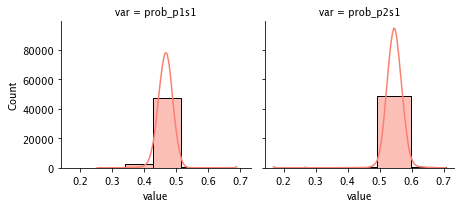

In [14]:
df_strategies_agg = simulation_output[['sim_nr', 'prob_p1s1', 'prob_p2s1']]
df_strategies_agg = df_strategies_agg.melt(id_vars=['sim_nr'], var_name='var', value_name='value')
g = sns.FacetGrid(df_strategies_agg, col = 'var', col_wrap=5)
g.map(sns.histplot, 'value', kde=True, bins=5, color='salmon')

Frequency distribution of players one and two probabilities of selecting strategy 1 in each simulation round:

Probability distributions for player 1 (ROW)

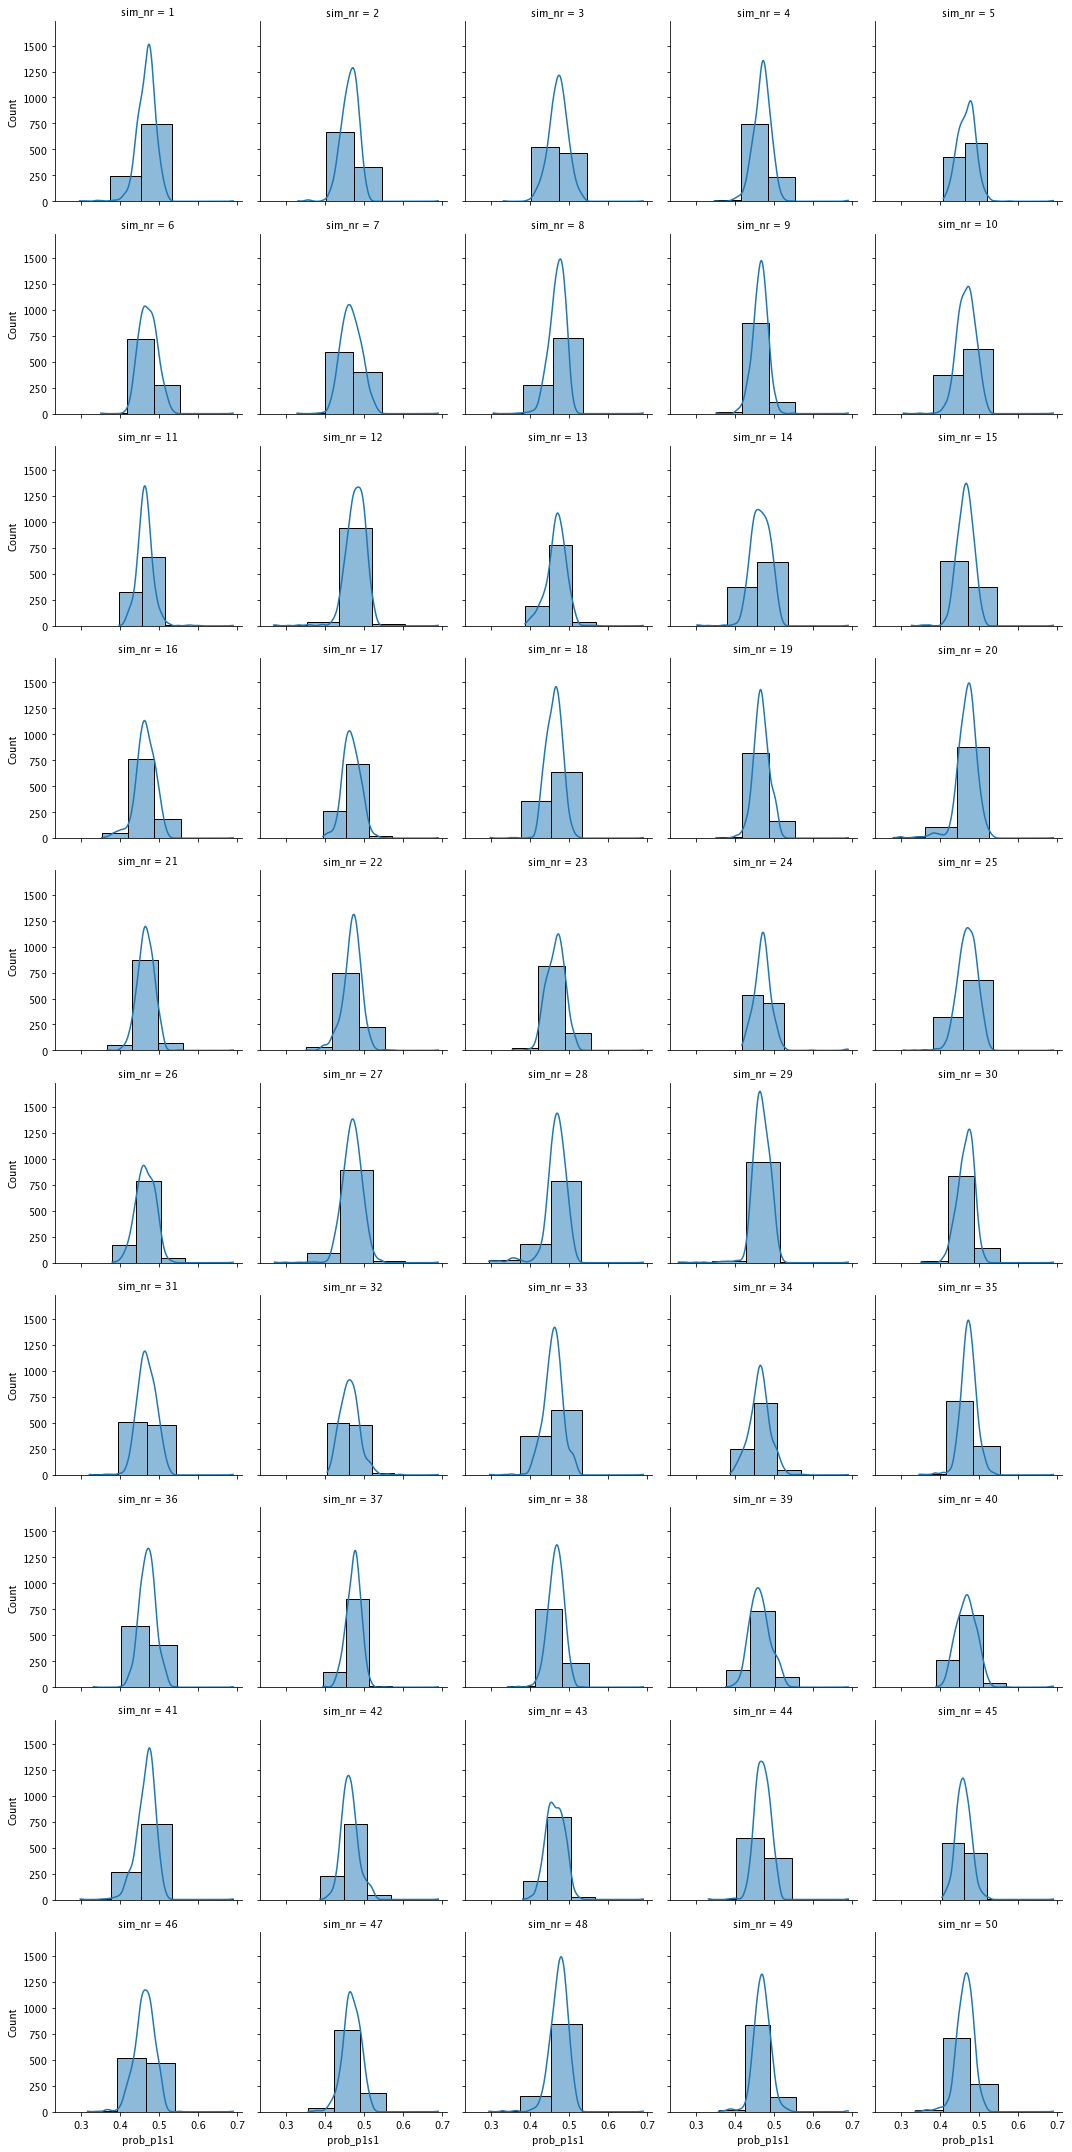

In [15]:
g = sns.FacetGrid(simulation_output, col = 'sim_nr', col_wrap=5)
g.map(sns.histplot, 'prob_p1s1', kde=True, bins=5)

Probability distributions for player 2 (COL)

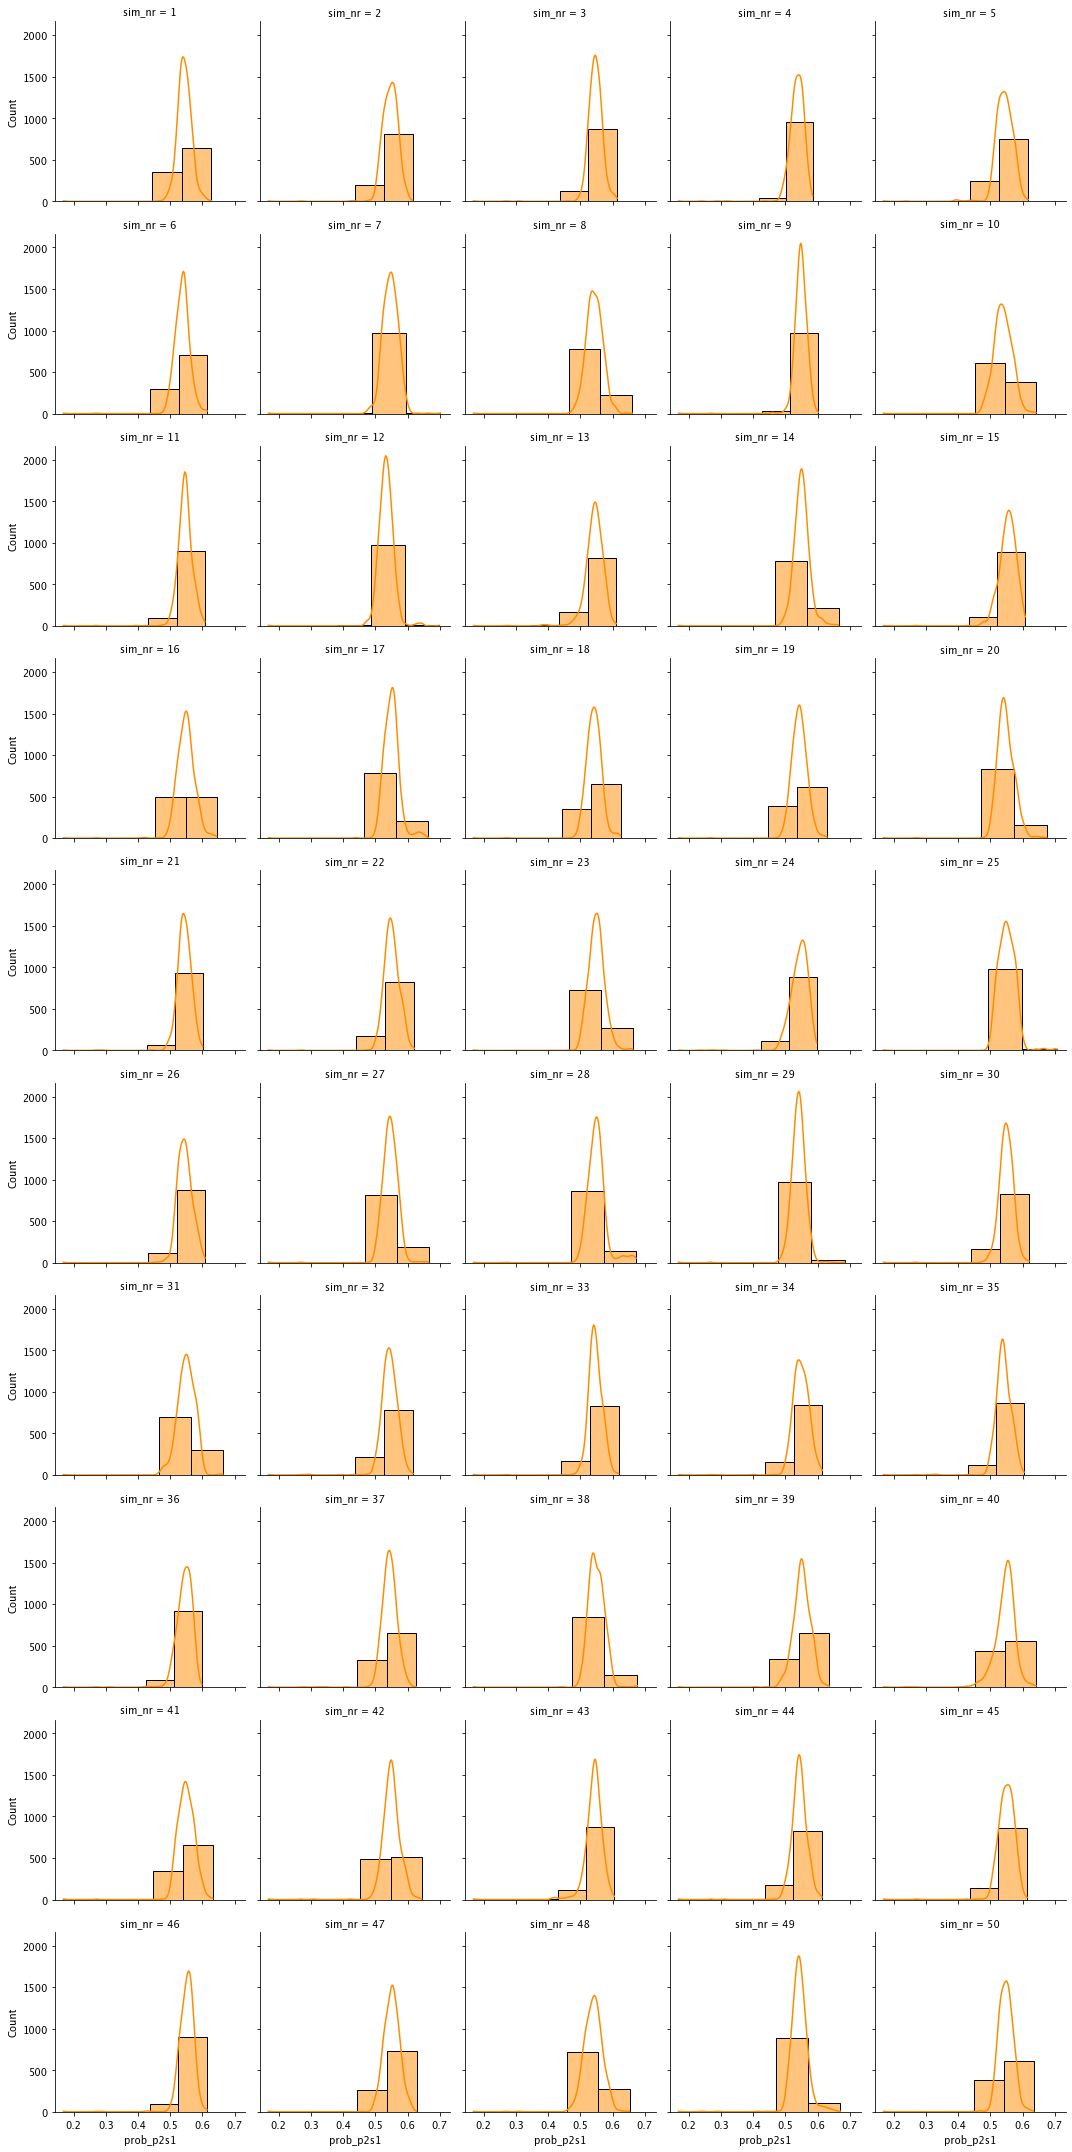

In [16]:
g = sns.FacetGrid(simulation_output, col = 'sim_nr', col_wrap=5)
g.map(sns.histplot, 'prob_p2s1', kde=True, bins=5, color='darkorange')

Equilibrium point predictions, based on the aggregated output of each simulation round, after $N$ periods

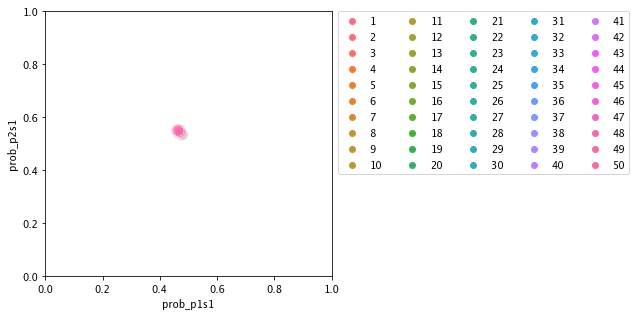

In [17]:
df_strategies = simulation_output[['sim_nr', 'round_nr', 'prob_p1s1', 'prob_p2s1']]
df_strategies = df_strategies.groupby(['sim_nr'],  as_index=False, sort=False).mean()
df_strategies['sim_nr'] = pd.Categorical(df_strategies['sim_nr'])
plt.figure(figsize=(9,4.5))
ax = sns.scatterplot(data=df_strategies, x="prob_p1s1", y="prob_p2s1", hue='sim_nr', s=130, alpha=0.5)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=5)
plt.tight_layout()

Density distribution of predicted equilibria across all simulation rounds

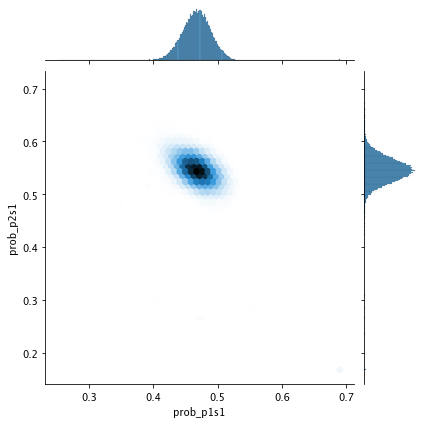

In [18]:
sns.jointplot(data=simulation_output, x='prob_p1s1', y='prob_p2s1', kind="hex")

Density distrubution of all predicted equilibria points, for all simulation rounds

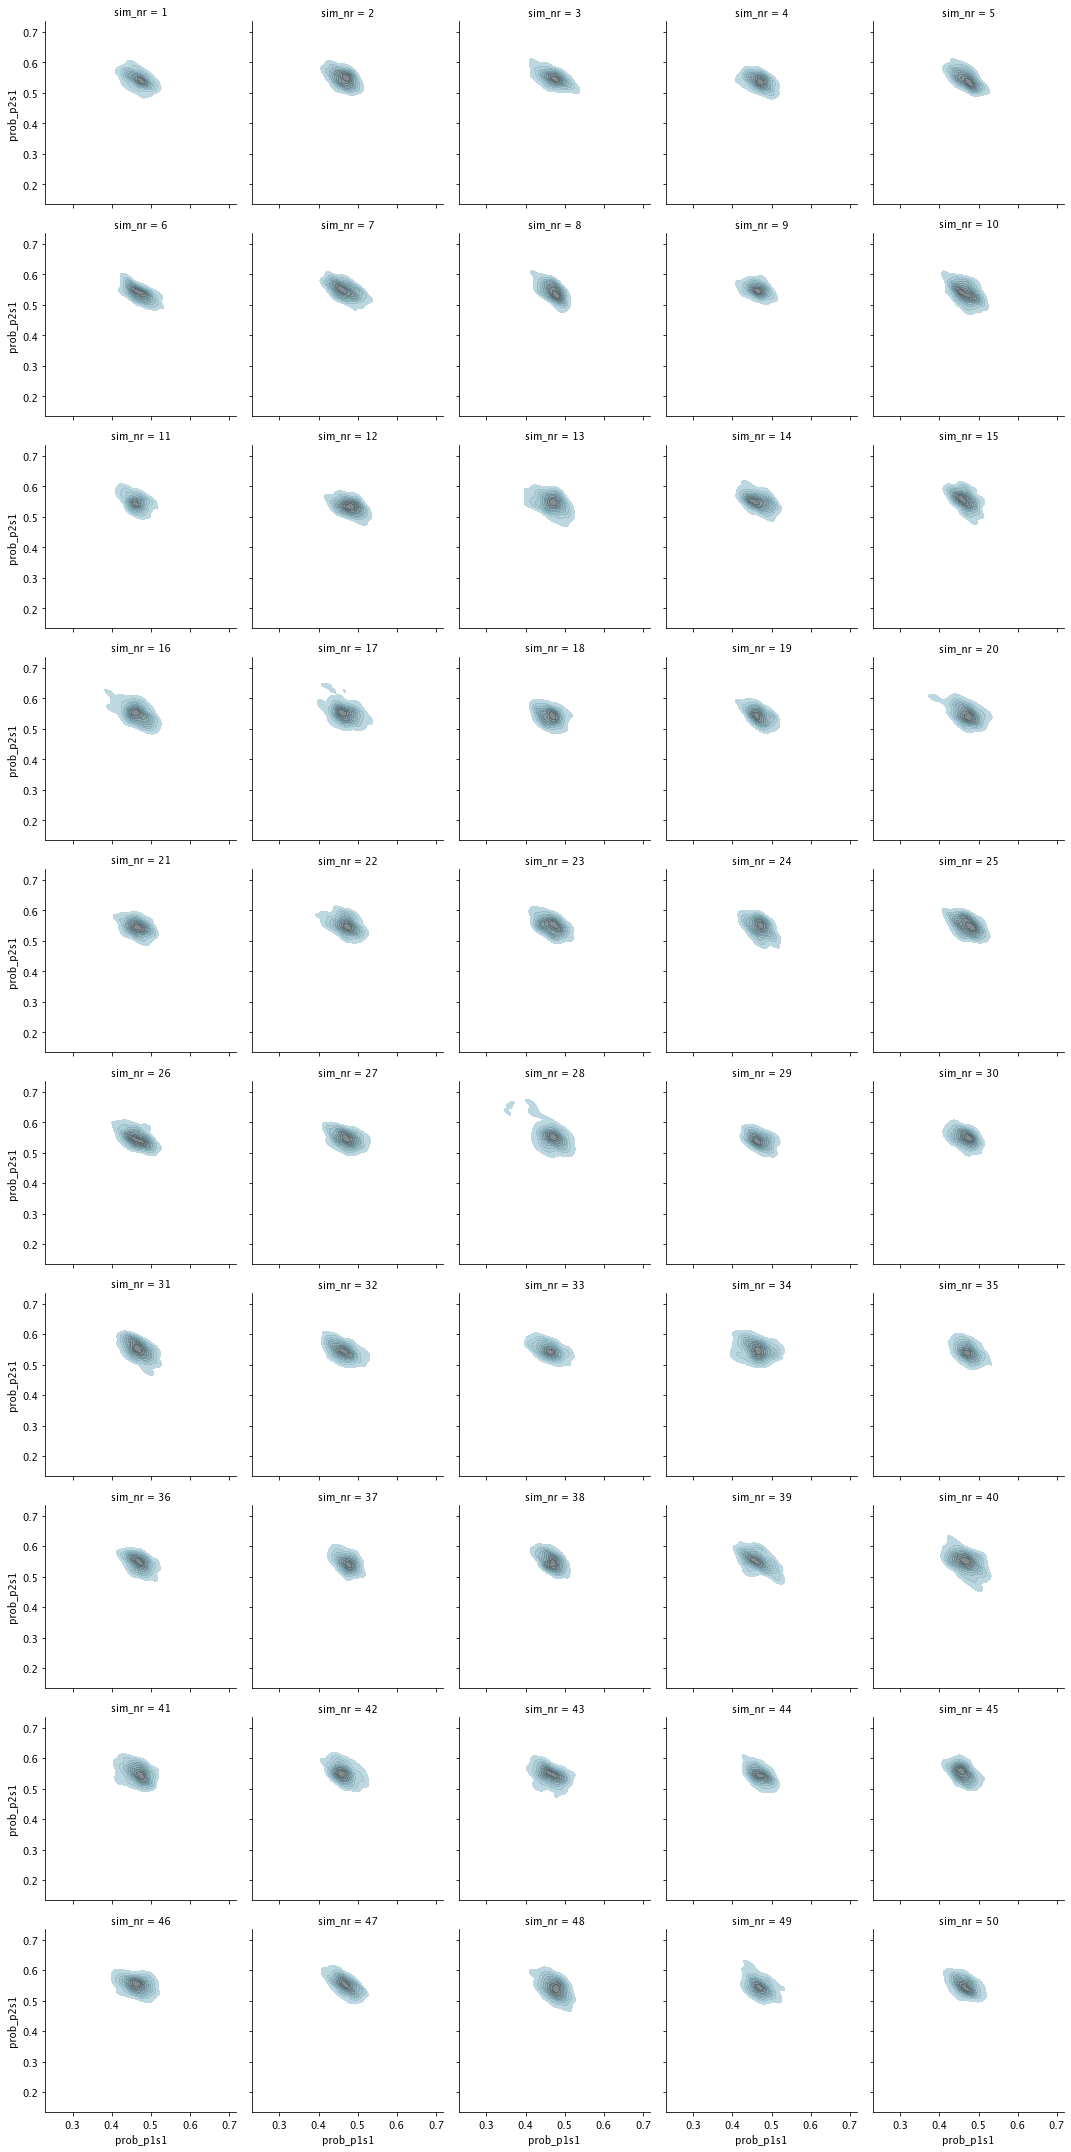

In [19]:
g = sns.FacetGrid(simulation_output, col = 'sim_nr', col_wrap=5)
g.map(sns.kdeplot, 'prob_p1s1', 'prob_p2s1', fill=True, color='lightblue', alpha=0.7)

Frequency of predicted selected strategies

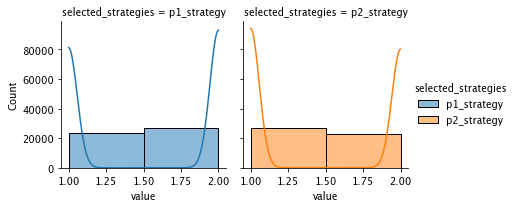

In [20]:
df_strategy_s = simulation_output[['sim_nr', 'round_nr', 'p1_strategy', 'p2_strategy']]
df_strategy_s = df_strategy_s.melt(id_vars=['sim_nr', 'round_nr'], var_name='selected_strategies', value_name='value')
g = sns.FacetGrid(df_strategy_s, col='selected_strategies', hue='selected_strategies')
g.map(sns.histplot, 'value', kde=True, bins=2)
g.add_legend()

### Attractions and Experience

Aggregated development of attractions $(A)$ to each player/strategy

<AxesSubplot:xlabel='round_nr', ylabel='value'>

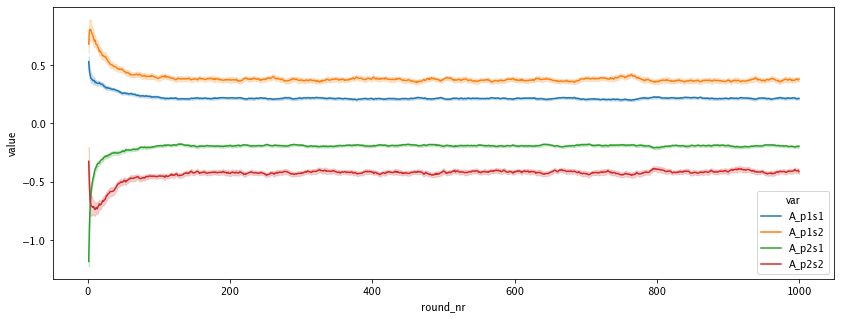

In [21]:
df_attractions = simulation_output[['sim_nr', 'round_nr','A_p1s1', 'A_p1s2', 'A_p2s1', 'A_p2s2']]
df_attractions = df_attractions.melt(id_vars=['sim_nr', 'round_nr'], var_name='var', value_name='value')
plt.figure(figsize=(14,5))
sns.lineplot(data=df_attractions, x='round_nr', y='value', hue='var')

Development of attractions in each simulation round

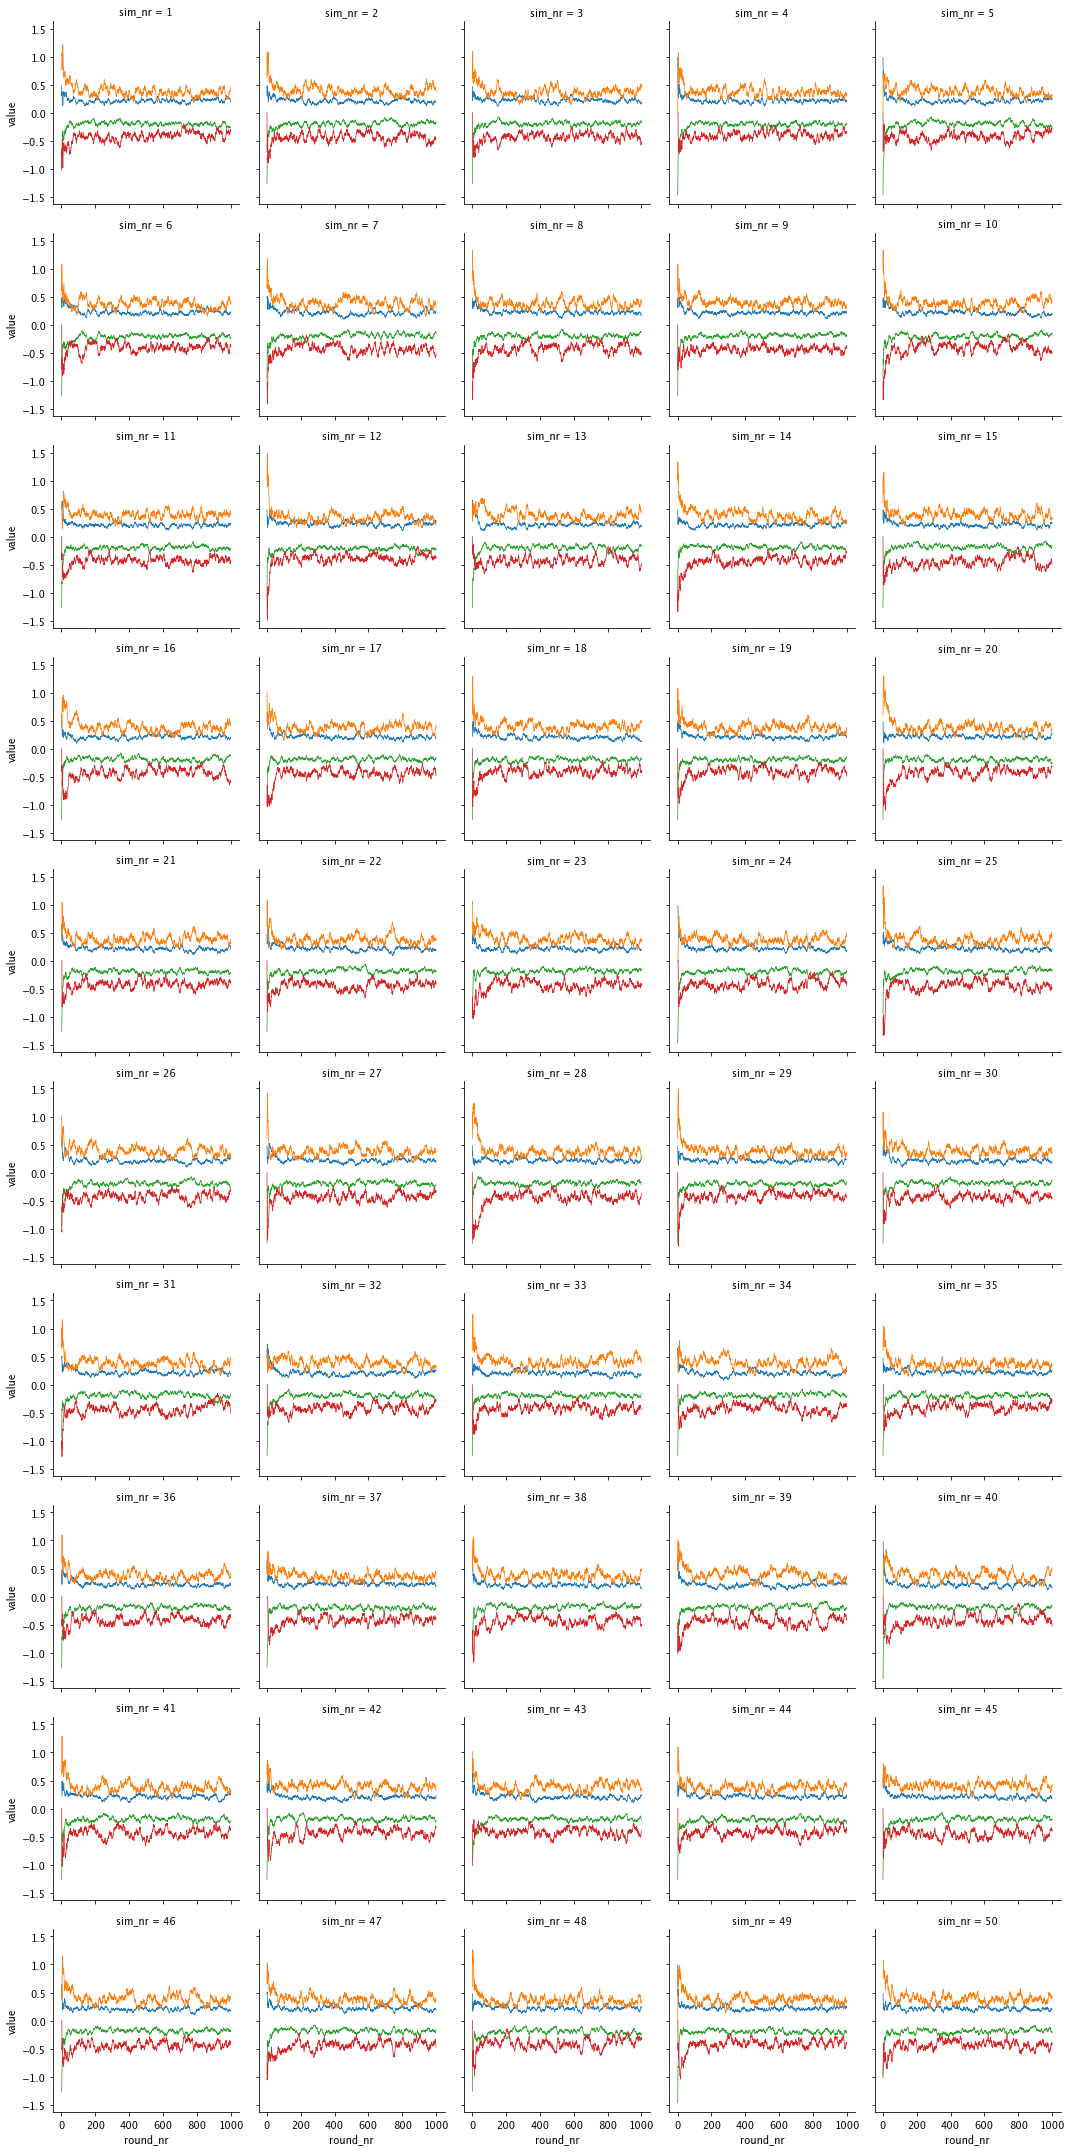

In [22]:
g = sns.FacetGrid(df_attractions, col = 'sim_nr', hue='var', col_wrap=5)
g.map(sns.lineplot, 'round_nr', 'value', linewidth = 0.75)

Development of the experience variable $(N)$ in each period (it doesn't change in different simulation rounds)

<AxesSubplot:xlabel='round_nr', ylabel='N'>

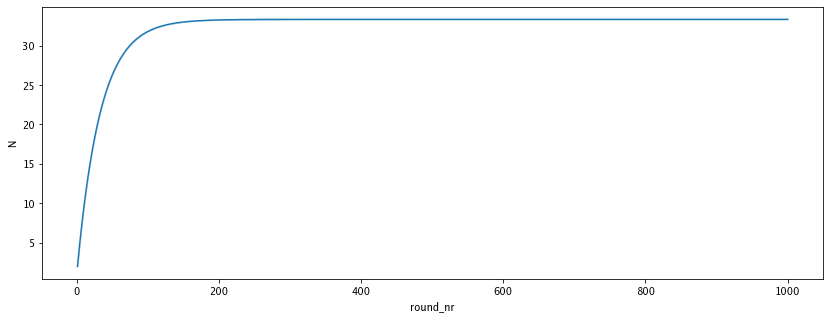

In [23]:
plt.figure(figsize=(14,5))
df_experience = simulation_output[['sim_nr', 'round_nr','N']]
sns.lineplot(data=df_experience, x='round_nr', y='N')

### Predicted Payoffs

Cumulative development of payoffs over time

<AxesSubplot:xlabel='round_nr', ylabel='value'>

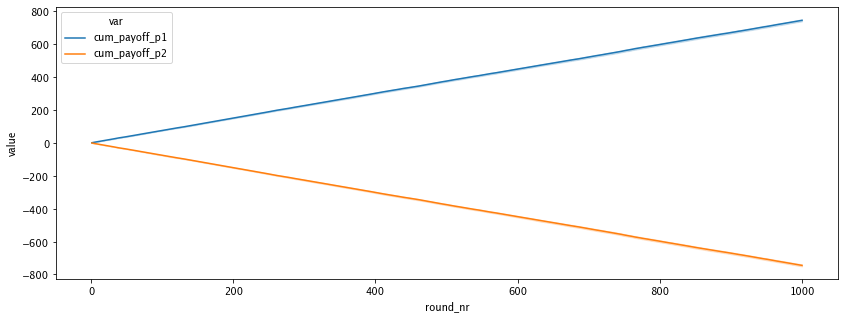

In [26]:
plt.figure(figsize=(14,5))
df_cumpayoffs = simulation_output[['sim_nr', 'round_nr', 'cum_payoff_p1', 'cum_payoff_p2']]
df_cumpayoffs = df_cumpayoffs.melt(id_vars=['sim_nr', 'round_nr'], var_name='var', value_name='value')
sns.lineplot(data=df_cumpayoffs, x='round_nr', y='value', hue='var')

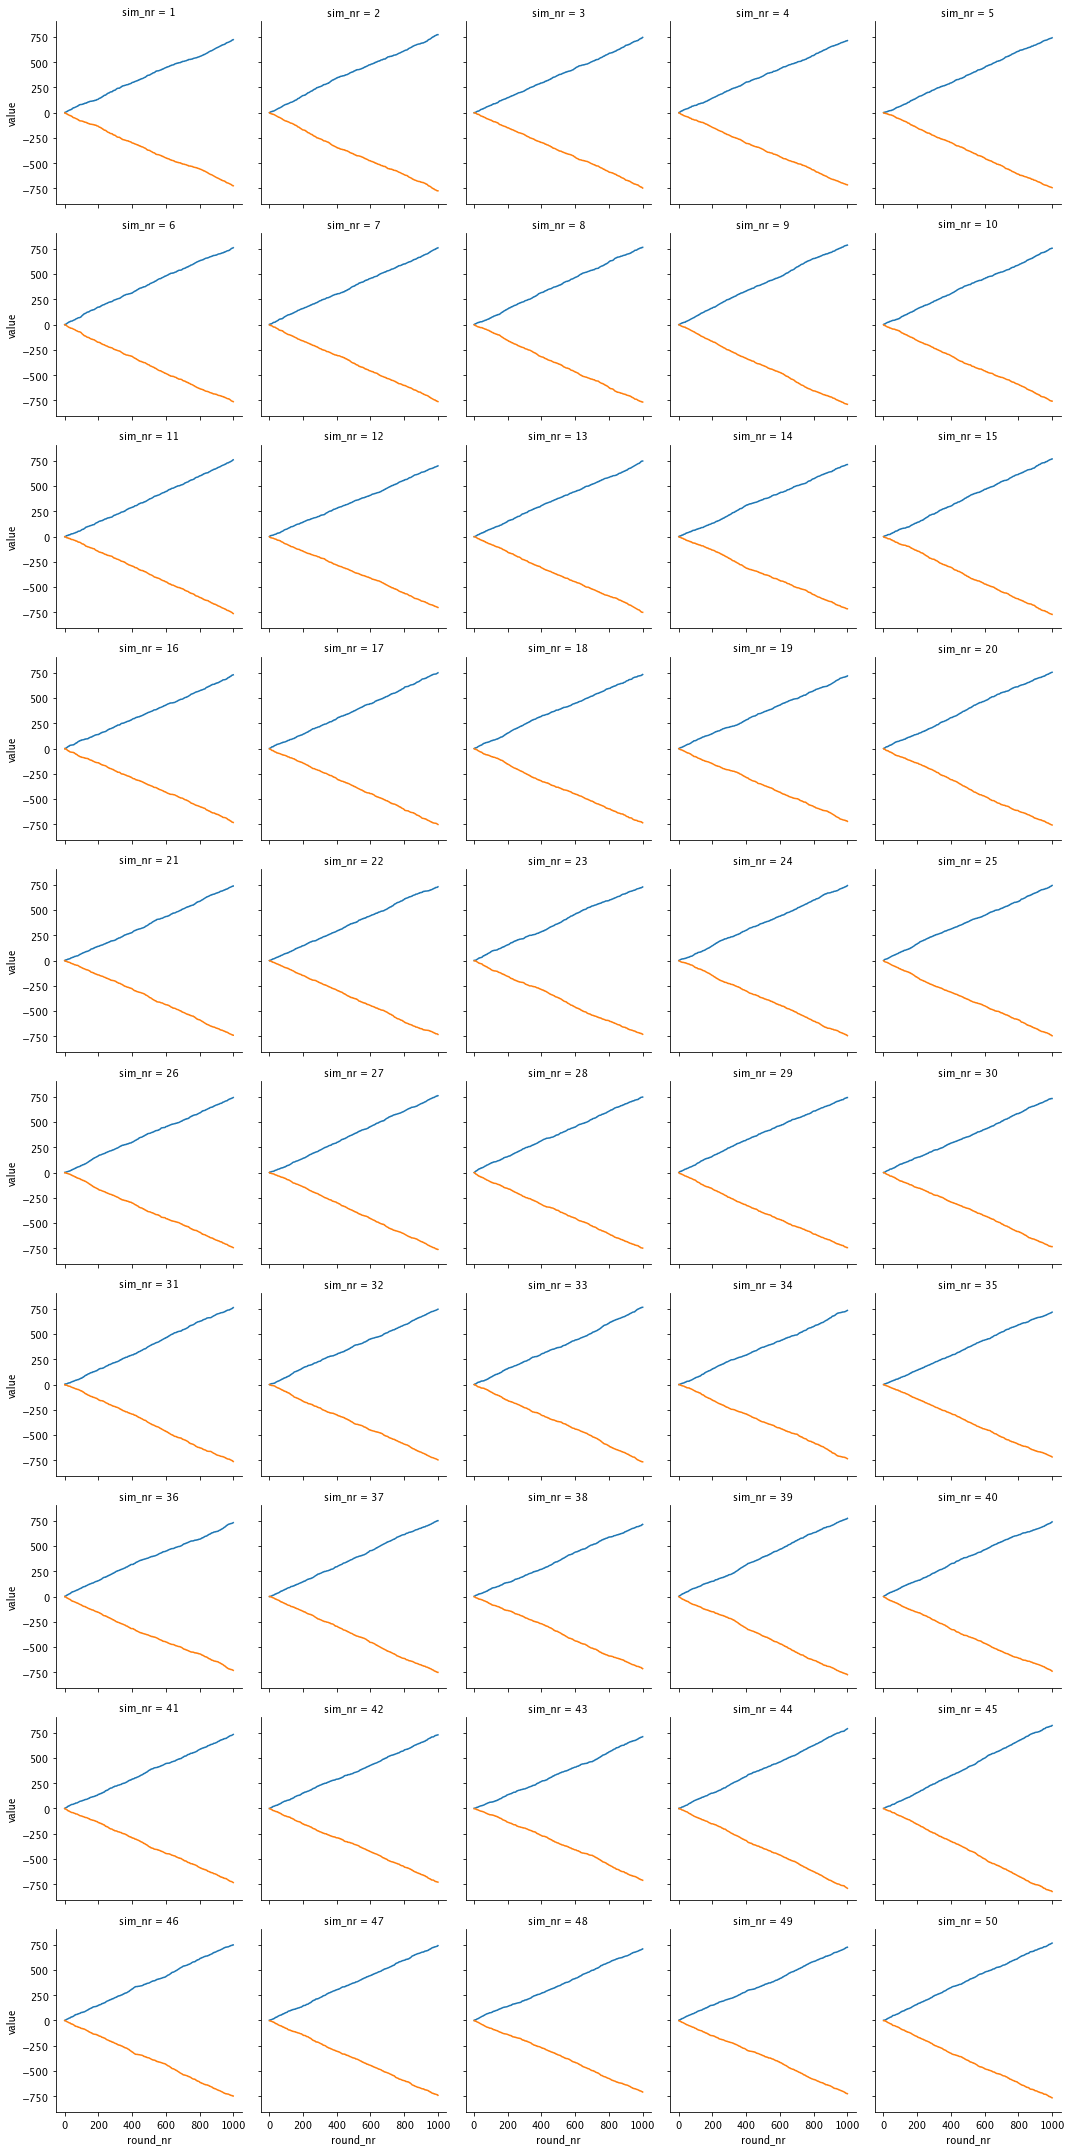

In [25]:
g = sns.FacetGrid(df_cumpayoffs, col = 'sim_nr', hue='var', col_wrap=5)
g.map(sns.lineplot, 'round_nr', 'value')

Density of payoff values in each simulation round

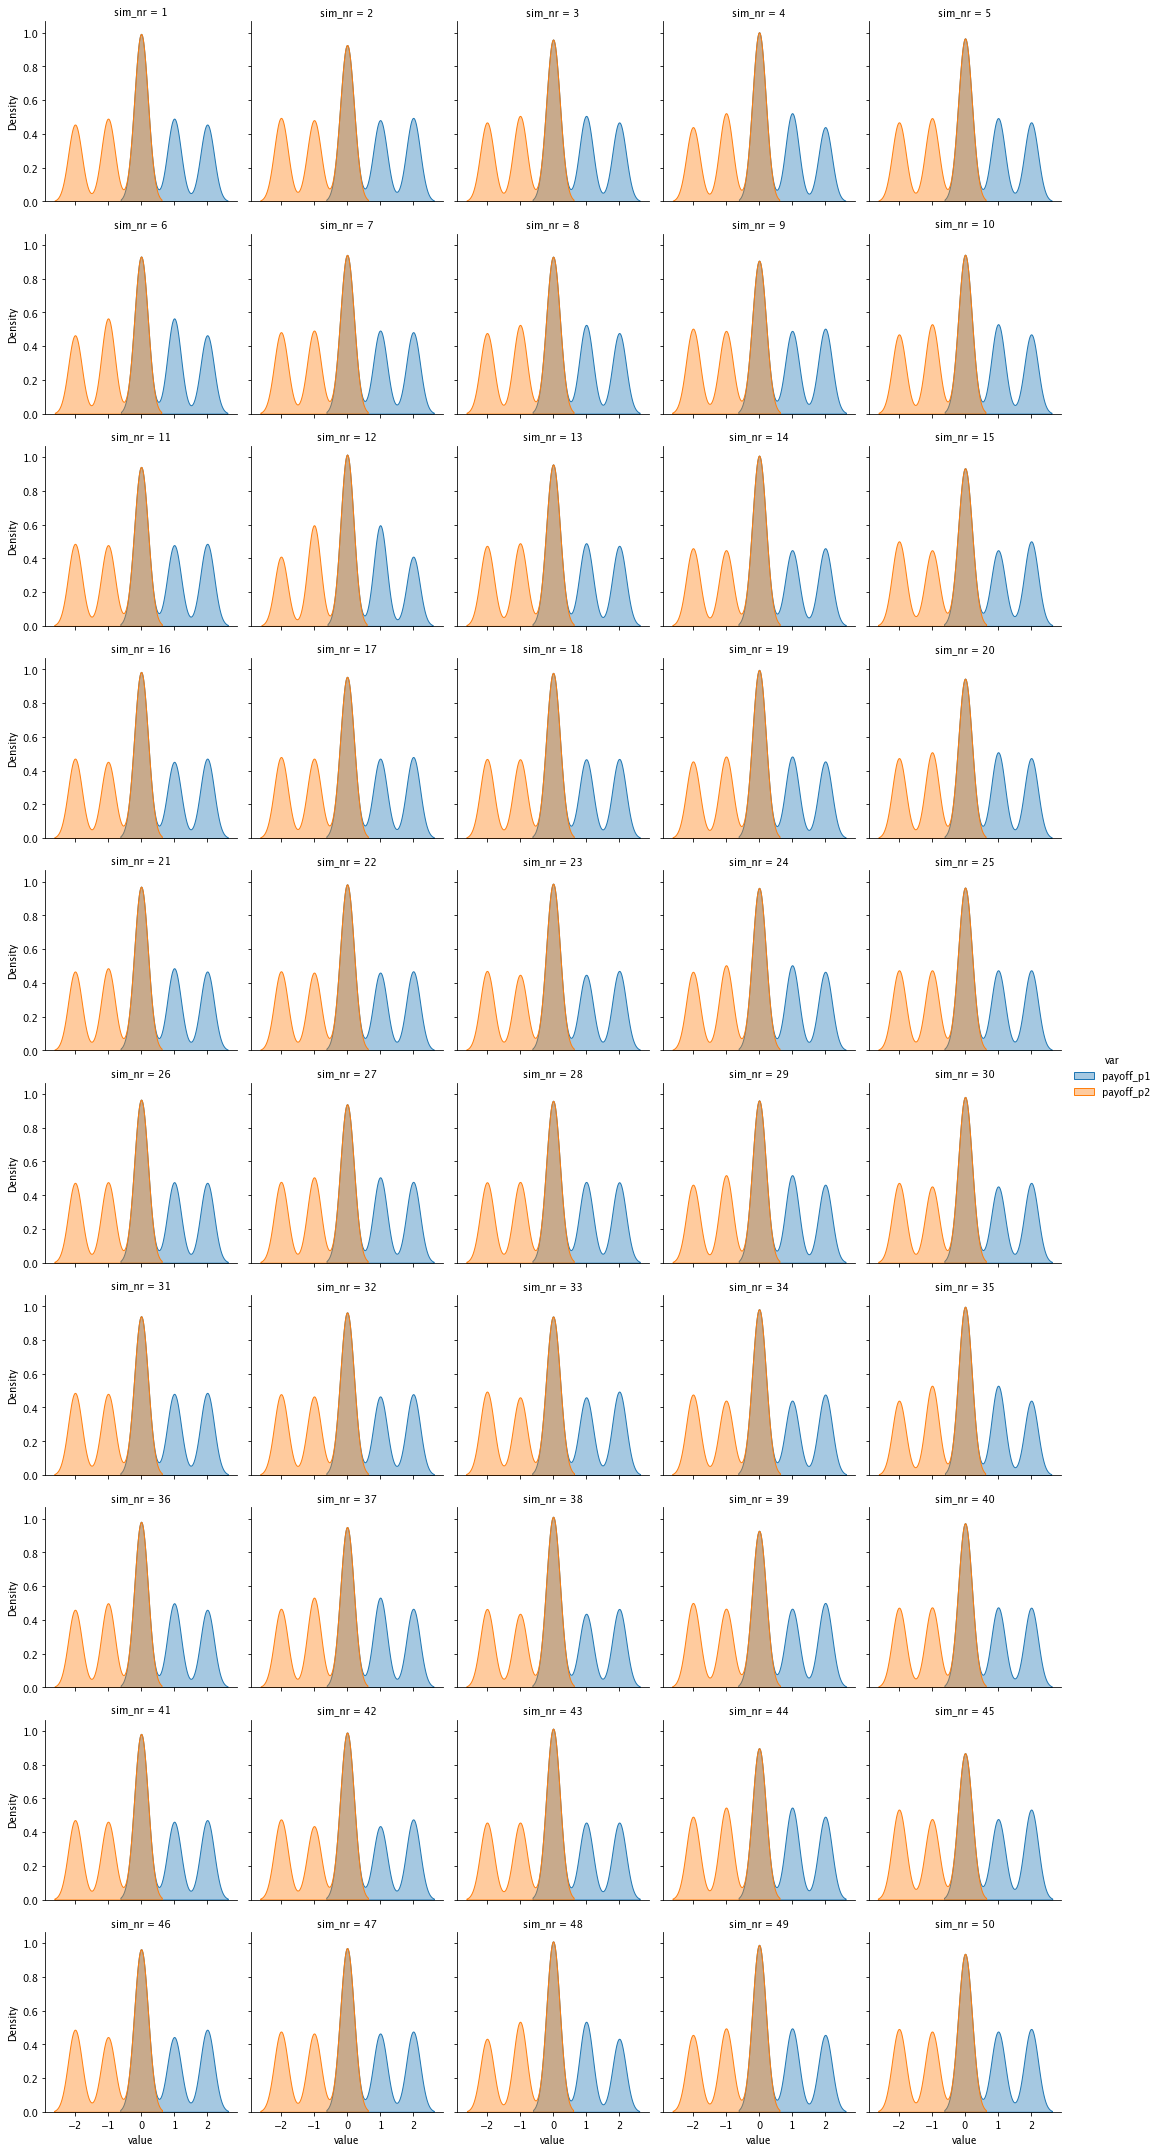

In [27]:
df_payoffs = simulation_output[['sim_nr', 'round_nr', 'payoff_p1', 'payoff_p2']]
df_payoffs = df_payoffs.melt(id_vars=['sim_nr', 'round_nr'], var_name='var', value_name='value')
g = sns.FacetGrid(df_payoffs, col = 'sim_nr', hue='var', col_wrap=5)
g.map(sns.kdeplot, 'value', fill=True, alpha = 0.4)
g.add_legend()

Payoffs per period aggregated for all simulations

<AxesSubplot:xlabel='round_nr', ylabel='value'>

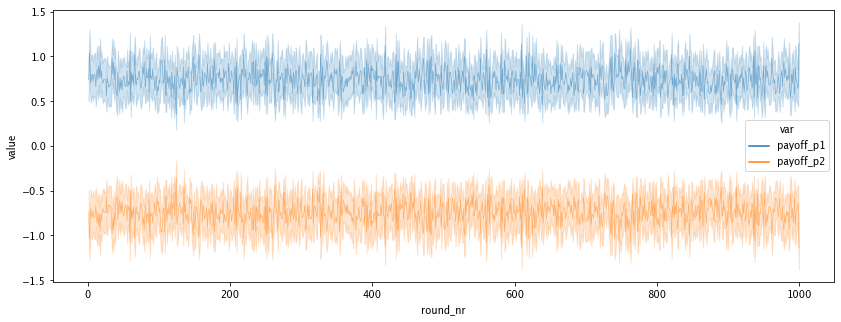

In [28]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_payoffs, x='round_nr', y='value', hue='var', linewidth=0.7, alpha=0.5)

Payoff value achieve aggregated per period

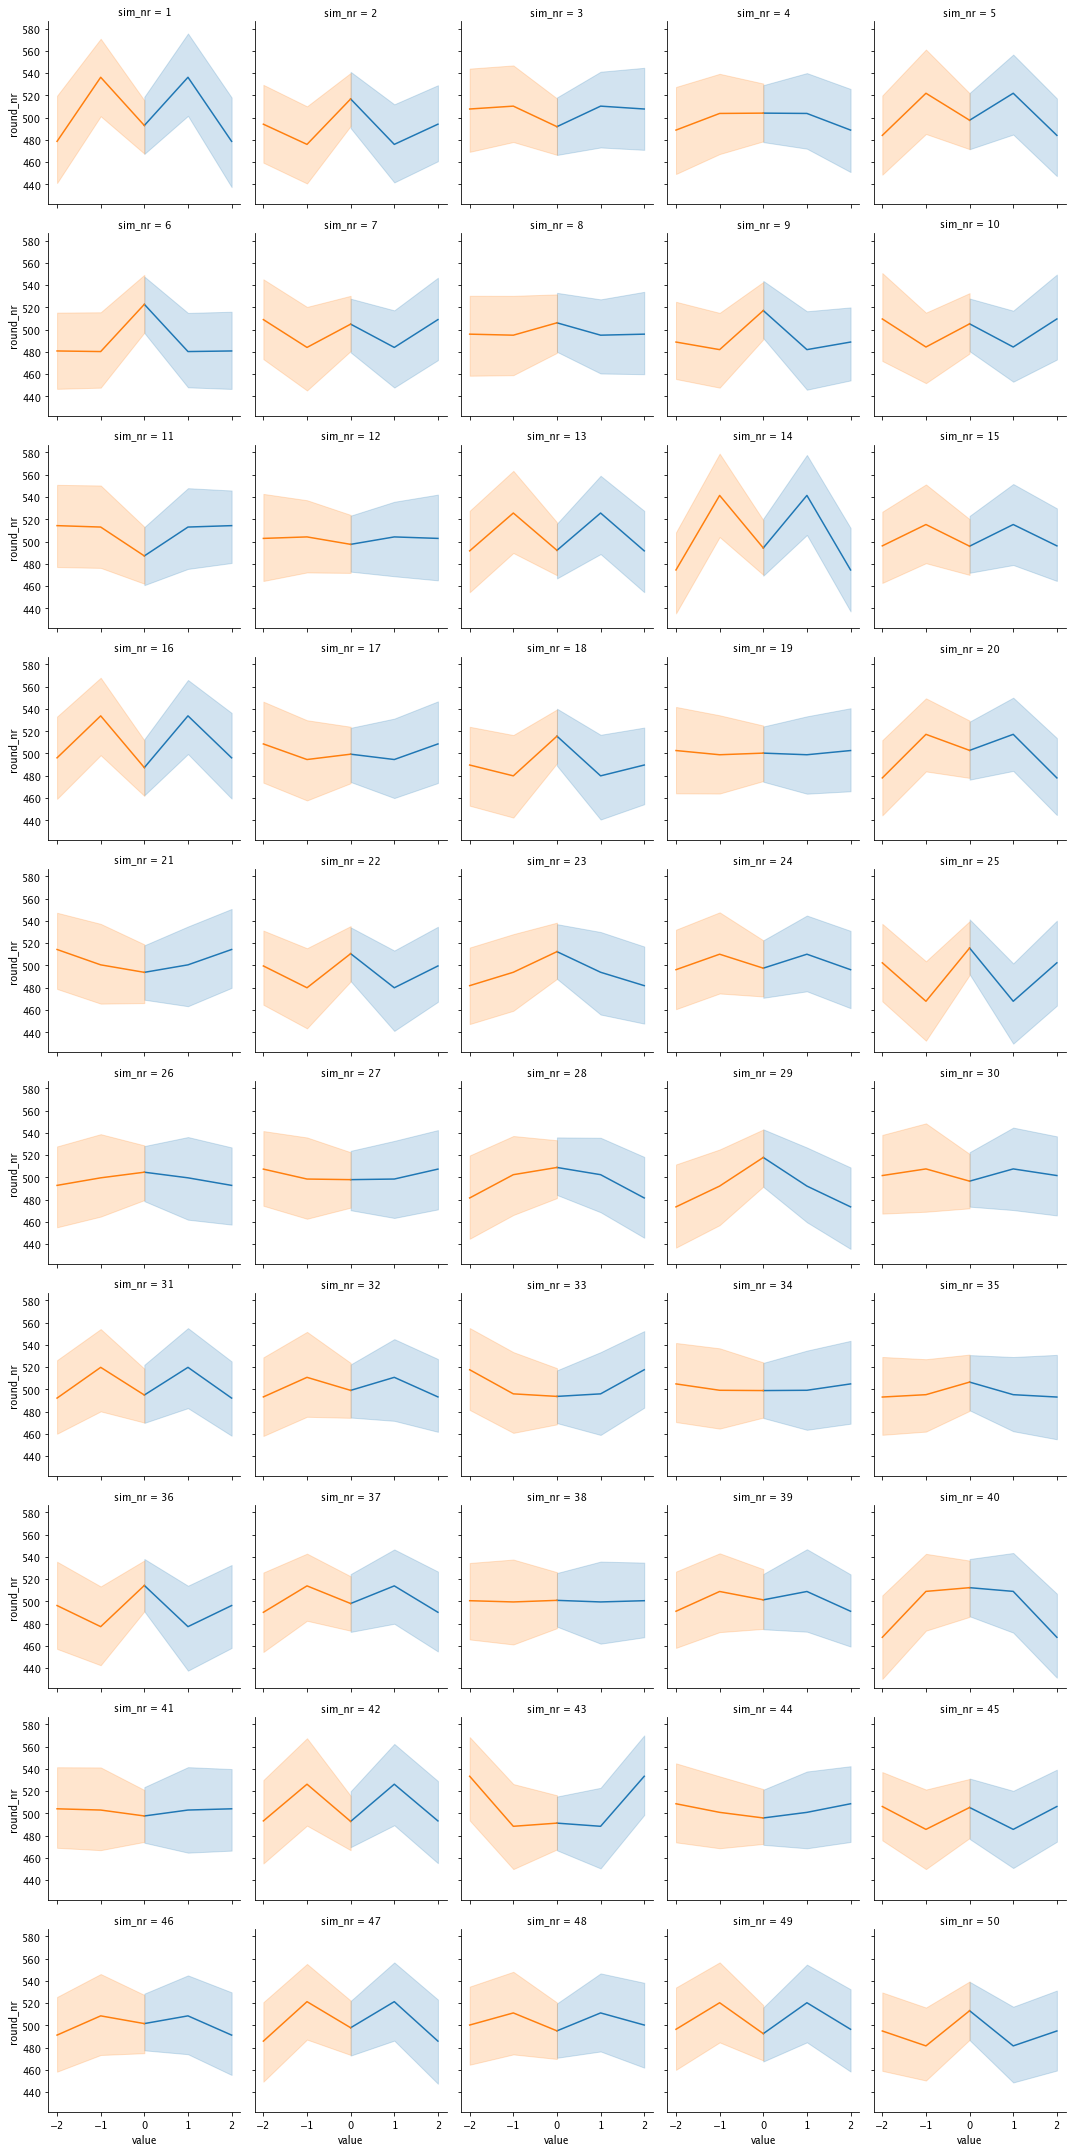

In [29]:
g = sns.FacetGrid(df_payoffs, col="sim_nr", hue="var",  col_wrap=5)
g.map(sns.lineplot, "value", "round_nr")

## 4. References

Baddeley, M. (2018). Behavioural economics and finance. Routledge. Chapter 5, p. 74-96.

Camerer, C., & Hua Ho, T. (1999). Experience‐weighted attraction learning in normal form games. Econometrica, 67(4), 827-874

Cheung, Y. W., & Friedman, D. (1997). Individual learning in normal form games: Some laboratory results. Games and economic behavior, 19(1), 46-76.

Erev, I., & Roth, A. E. (1998). Predicting how people play games: Reinforcement learning in experimental games with unique, mixed strategy equilibria. American economic review, 848-881.

Ho, T. H., Camerer, C. F., & Chong, J. K. (2007). Self-tuning experience weighted attraction learning in games. Journal of economic theory, 133(1), 177-198.

Moffatt, P. G. (2015). Experimetrics: Econometrics for experimental economics. Macmillan International Higher Education. Chapter 18, p. 419-440.

Tanimoto, J. (2015). Fundamentals of evolutionary game theory and its applications. Springer Japan.